In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [15]:
df = pd.read_csv('companies_10-k - Sheet3.csv')

Financial Metric

In [20]:
# Calculate YoY growth for each financial metric
metrics = ["Total Revenue", "Net Income", "Total Assets", "Total Liabilities", "Cash Flow from Operations"]
for metric in metrics:
    df[f"{metric} Growth (%)"] = df.groupby("Company")[metric].pct_change() * 100

Profit Margin (%)

In [22]:
df["Profit Margin (%)"] = (df["Net Income"] / df["Total Revenue"]) * 100

Return on Assets (ROA) (%)

In [24]:
df["ROA (%)"] = (df["Net Income"] / df["Total Assets"]) * 100

Return on Equity (ROE) (%)

In [25]:
df["ROE (%)"] = (df["Net Income"] / (df["Total Assets"] - df["Total Liabilities"])) * 100

Debt-to-Asset Ratio

In [26]:
df["Debt-to-Asset Ratio"] = df["Total Liabilities"] / df["Total Assets"]

Debt-to-Equity Ratio

In [27]:
df["Debt-to-Equity Ratio"] = df["Total Liabilities"] / (df["Total Assets"] - df["Total Liabilities"])

Operating Efficiency Trends

In [29]:
df["Cash Flow to Revenue Ratio"] = df["Cash Flow from Operations"] / df["Total Revenue"]

Ranking Companies by Financial Performance

In [32]:
df["Revenue Rank"] = df.groupby("Year")["Total Revenue"].rank(ascending=False)
df["Profit Rank"] = df.groupby("Year")["Net Income"].rank(ascending=False)
df["Assets Rank"] = df.groupby("Year")["Total Assets"].rank(ascending=False)

Best & Worst Performing Years per Company

In [33]:
best_years = df.loc[df.groupby("Company")["Total Revenue"].idxmax()]
worst_years = df.loc[df.groupby("Company")["Total Revenue"].idxmin()]

print("Best Years:\n", best_years)
print("\nWorst Years:\n", worst_years)

Best Years:
      Company  Year  Total Revenue  Net Income  Total Assets  \
1      Apple  2023         394328       96995        352583   
5  Microsoft  2024         245122       88136        512163   
8      Tesla  2024          97690        7153        122070   

   Cash Flow from Operations  Total Liabilities  Revenue Growth (%)  \
1                     110543             290437            7.793788   
5                     118548             243686           15.669962   
8                      14923              48390            0.947578   

   Net Income Growth (%)  Total Revenue Growth (%)  ...  Profit Margin (%)  \
1              -2.813543                  7.793788  ...          24.597543   
5              21.800417                 15.669962  ...          35.955973   
8             -52.230533                  0.947578  ...           7.322141   

     ROA (%)     ROE (%)  Debt-to-Asset Ratio  Debt-to-Equity Ratio  \
1  27.509835  156.076015             0.823741              4.6734

Trend Analysis of Financial Metrics

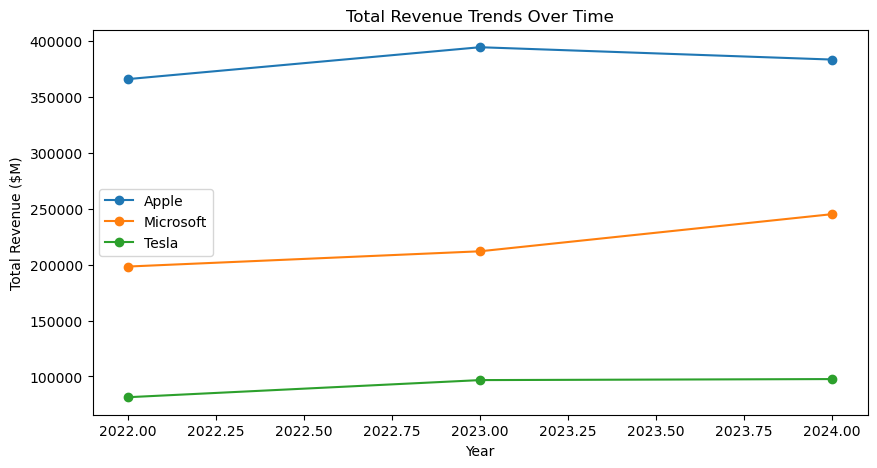

In [35]:
plt.figure(figsize=(10, 5))
for company in df["Company"].unique():
    subset = df[df["Company"] == company]
    plt.plot(subset["Year"], subset["Total Revenue"], marker='o', label=company)

plt.xlabel("Year")
plt.ylabel("Total Revenue ($M)")
plt.title("Total Revenue Trends Over Time")
plt.legend()
plt.show()

Forecasting Future Financial Metrics (Using Linear Regression)

In [38]:
df_forecast = df[df["Company"] == "Apple"]  # Choose a company
X = df_forecast["Year"].values.reshape(-1, 1)
y = df_forecast["Total Revenue"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

future_years = np.array([[2025], [2026], [2027]])  # Predict for future years
predictions = model.predict(future_years)

print("Predicted Revenue for Apple:\n", predictions)

Predicted Revenue for Apple:
 [[398611.33333333]
 [407345.33333333]
 [416079.33333333]]


In [39]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Cash Flow from Operations,Total Liabilities,Revenue Growth (%),Net Income Growth (%),Total Revenue Growth (%),...,Profit Margin (%),ROA (%),ROE (%),Debt-to-Asset Ratio,Debt-to-Equity Ratio,Market Share (%),Cash Flow to Revenue Ratio,Revenue Rank,Profit Rank,Assets Rank
0,Apple,2022,365817,99803,352755,122151,302083,NaN,NaN,NaN,...,27.282220,28.292441,196.958873,0.856354,5.961537,56.667581,0.333913,1.0,1.0,2.0
1,Apple,2023,394328,96995,352583,110543,290437,7.793788,-2.813543,7.793788,...,24.597543,27.509835,156.076015,0.823741,4.673462,56.090900,0.280333,1.0,1.0,2.0
2,Apple,2024,383285,93736,364980,118254,308030,-2.800461,-3.359967,-2.800461,...,24.455953,25.682503,164.593503,0.843964,5.408780,52.787024,0.308528,1.0,1.0,2.0
3,Microsoft,2022,198270,72738,364840,89035,198298,NaN,NaN,NaN,...,36.686337,19.936959,43.675469,0.543520,1.190679,30.713393,0.449059,2.0,2.0,1.0
4,Microsoft,2023,211915,72361,411976,87582,205753,6.882030,-0.518299,6.882030,...,34.146238,17.564373,35.088715,0.499430,0.997721,30.143695,0.413288,2.0,2.0,1.0
5,Microsoft,2024,245122,88136,512163,118548,243686,15.669962,21.800417,15.669962,...,35.955973,17.208584,32.828138,0.475798,0.907661,33.758850,0.483629,2.0,2.0,1.0
6,Tesla,2022,81462,12587,82338,14724,36440,NaN,NaN,NaN,...,15.451376,15.286988,27.423853,0.442566,0.793934,12.619027,0.180747,3.0,3.0,3.0
7,Tesla,2023,96773,14974,106618,13256,43009,18.795267,18.964010,18.795267,...,15.473324,14.044533,23.540694,0.403393,0.676146,13.765405,0.136980,3.0,3.0,3.0
8,Tesla,2024,97690,7153,122070,14923,48390,0.947578,-52.230533,0.947578,...,7.322141,5.859753,9.708198,0.396412,0.656759,13.454125,0.152759,3.0,3.0,3.0


 CAGR (Compound Annual Growth Rate)
Objective: Measure the consistent annual growth rate over multiple years.

In [31]:
def calculate_cagr(df, metric):
    df_cagr = df.groupby("Company").apply(
        lambda x: ((x[metric].iloc[-1] / x[metric].iloc[0]) ** (1 / (x["Year"].iloc[-1] - x["Year"].iloc[0])) - 1) * 100
    ).reset_index(name=f"{metric} CAGR (%)")
    return df_cagr

# Calculate CAGR for all key metrics
cagr_results = [calculate_cagr(df, metric) for metric in metrics]

# Merge results
df_cagr = cagr_results[0]
for i in range(1, len(cagr_results)):
    df_cagr = df_cagr.merge(cagr_results[i], on="Company")

print(df_cagr)

     Company  Total Revenue CAGR (%)  Net Income CAGR (%)  \
0      Apple                2.359692            -3.087140   
1  Microsoft               11.189209            10.076849   
2      Tesla                9.508422           -24.615337   

   Total Assets CAGR (%)  Total Liabilities CAGR (%)  \
0               1.718031                    0.979535   
1              18.482136                   10.855213   
2              21.759909                   15.236120   

   Cash Flow from Operations CAGR (%)  
0                           -1.608087  
1                           15.389618  
2                            0.673499  
